#### ДЗ
1. Взять датасет(приложен в материалах - DZ_2_9.csv) в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?
2. Проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?
3. ДОП: Проведите кластеризацию DBSCAN с параметрами по умолчанию. Сколько точек было размечено как выбросы? Попробовать подобрать eps и min_samples так, чтобы ушел хотя бы один выброс

In [35]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('drive/MyDrive/DZ_2_9.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1355 non-null   float64
 1   price   1355 non-null   float64
dtypes: float64(2)
memory usage: 21.3 KB


<Axes: xlabel='year', ylabel='price'>

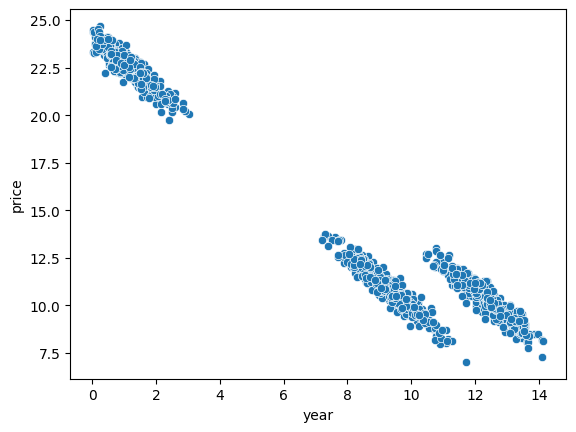

In [38]:
sns.scatterplot(df, x='year', y='price')

На графике очевидны 3 кластера.

<Axes: xlabel='year', ylabel='price'>

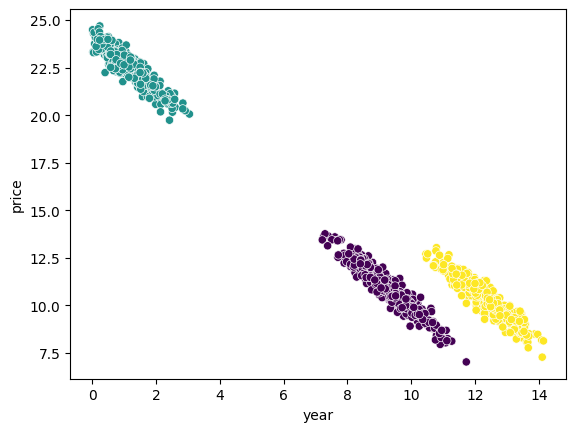

In [39]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(df)
gm_pred = gm.predict(df)
sns.scatterplot(df, x='year', y='price', c=gm_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='year', ylabel='price'>

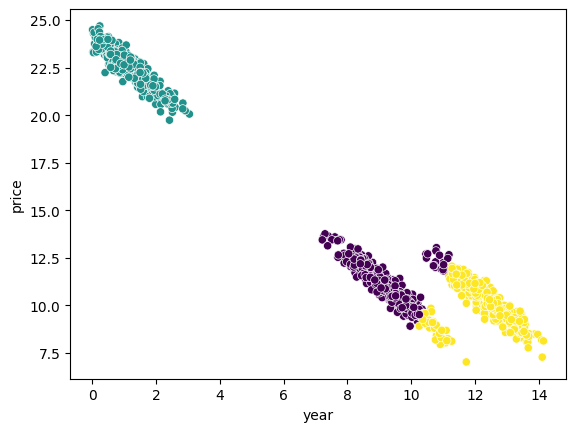

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(df)
km_pred = km.predict(df)
sns.scatterplot(df, x='year', y='price', c=km_pred)

Вывод: Алгоритм GMM справился с задачей кластеризации лучше.

<Axes: xlabel='year', ylabel='price'>

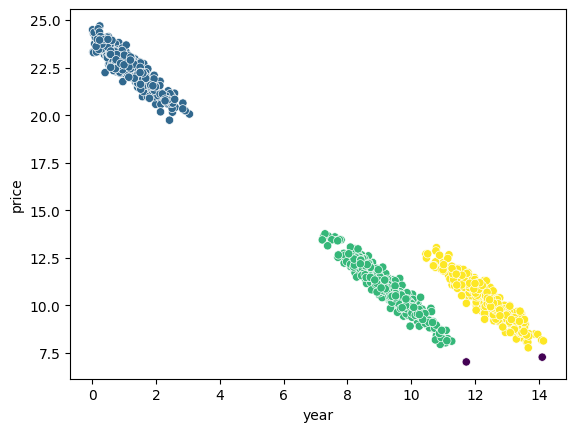

In [41]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN()
dbs.fit(df)
sns.scatterplot(df, x='year', y='price', c=dbs.labels_)

2 точки отмечены как выбросы.

<Axes: xlabel='year', ylabel='price'>

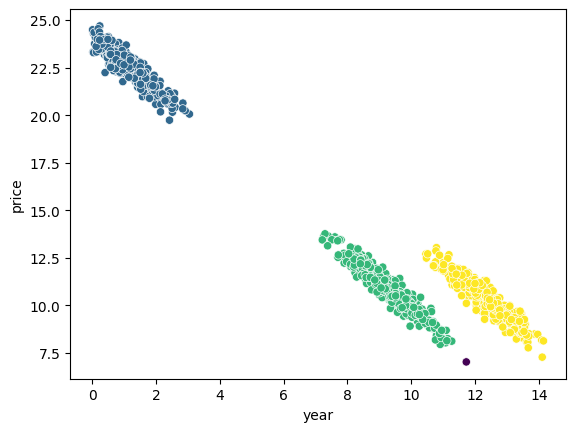

In [42]:
dbs = DBSCAN(eps=1)
dbs.fit(df)
sns.scatterplot(df, x='year', y='price', c=dbs.labels_)

Увеличив значение eps в 2 раза, удалось убрать один выброс.